In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from typing import Tuple

Now that you've learned about tensors, variables, and automatic differentiation, you're ready to learn how to define a neural network from scratch using lower-level TensorFlow operations. It's important to understand these foundational concepts because they give you the flexibility to customize your neural networks in any way you like.

As a reminder, here's the structure of the neural network you defined using Keras:

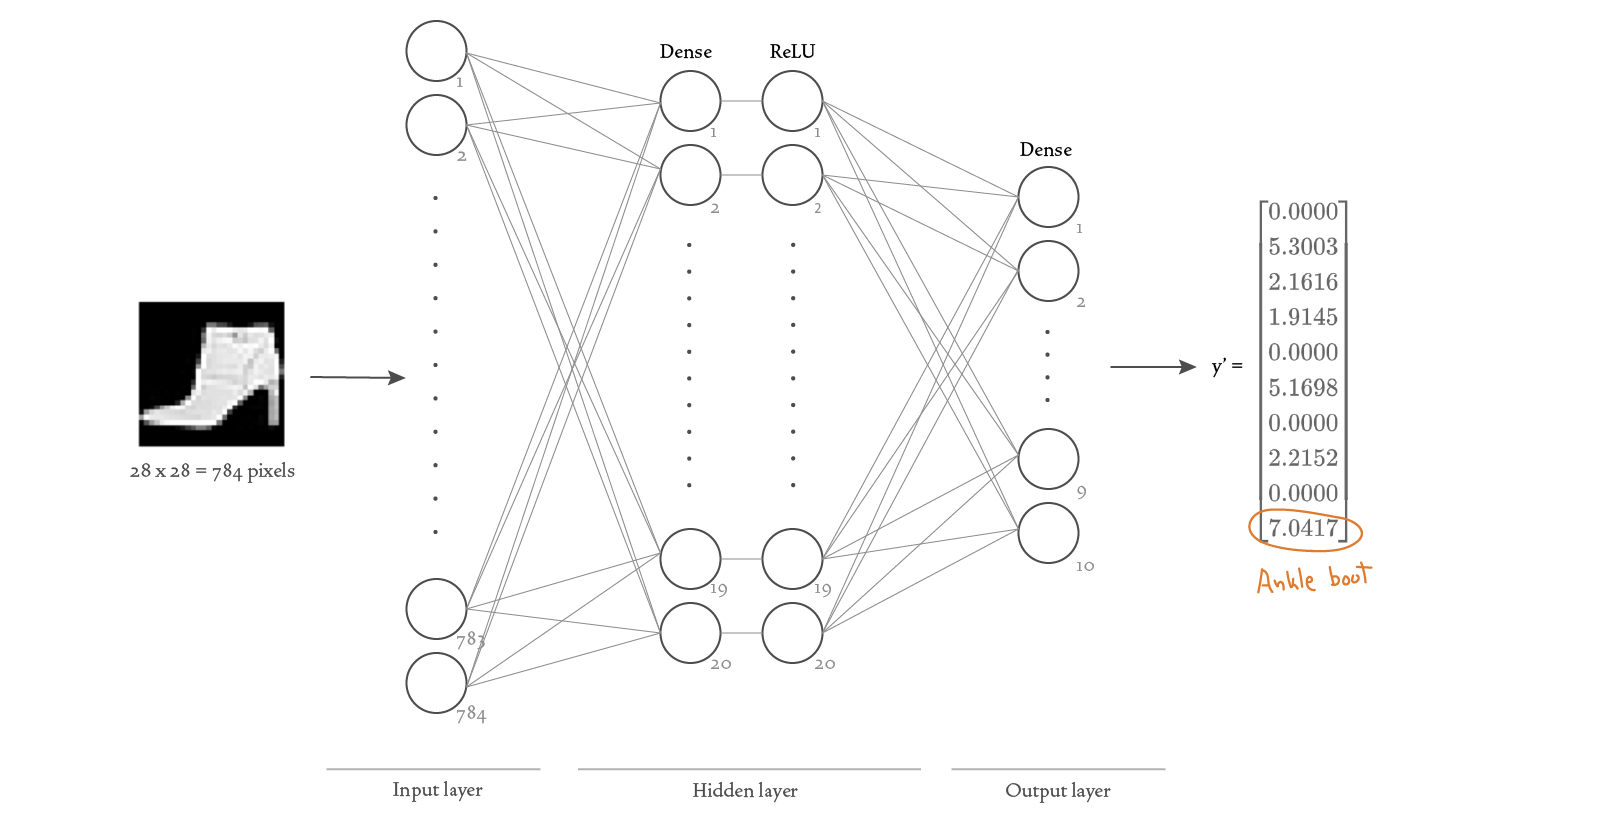

And here's the same neural network, this time showing the $W$ and $b$ parameters you want to learn during training: 

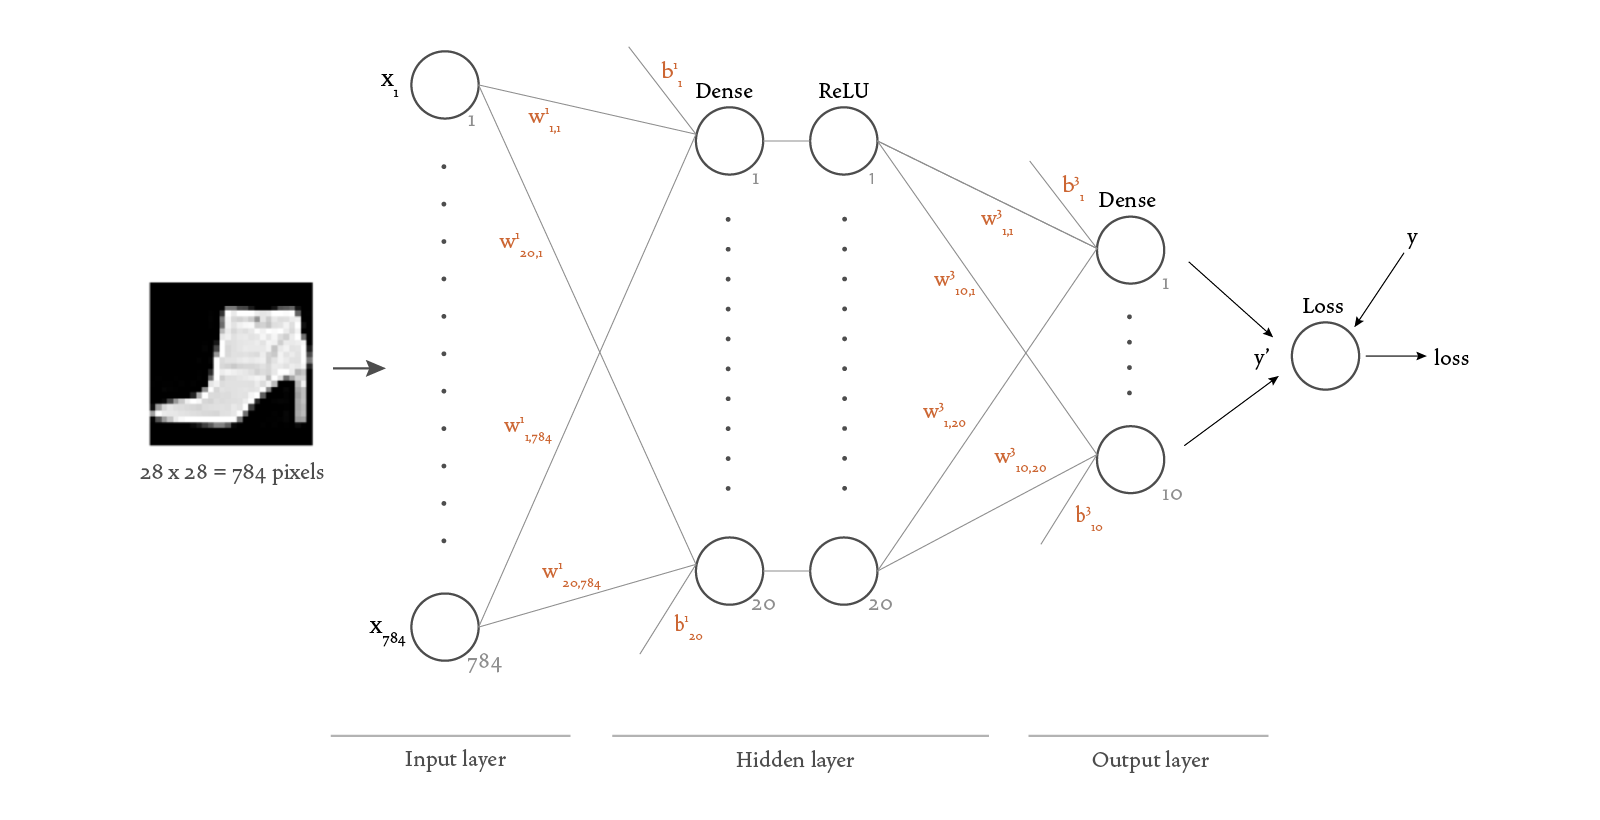

Notice that your neural network is composed of two `Dense` layers, and that the first contains a `ReLU` (rectified linear unit) activation function. In Keras, you can build your model by simply initializing the `Dense` objects with the appropriate activation functions. If you don't want to use Keras, you need to understand the operations performed by a `Dense` layer a bit better and replicate them. It turns out that a `Dense` layer is just about the simplest type of layer you can use, so it's not that hard to understand and replicate. A `Dense` layer takes as input a $W$ parameter, a $b$ parameter, and data $x$ that comes from the previous layer, and produces the following output:

$$
z = Wx + b
$$

The output of the first `Dense` layer is then passed as input to a `ReLU` non-linear function in the following way:

$$
a = ReLU(z)
$$

Let's see how you can represent these concepts using TensorFlow code.

In [2]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    initializer = tf.keras.initializers.GlorotUniform()
    self.W1 = tf.Variable(initializer(shape=(784, 20)))
    self.b1 = tf.Variable(tf.zeros(shape=(20,)))
    self.W2 = tf.Variable(initializer(shape=(20, 10)))
    self.b2 = tf.Variable(tf.zeros(shape=(10,)))

  def call(self, x: tf.Tensor) -> tf.Tensor:
    x = tf.reshape(x, [-1, 784])
    x = tf.matmul(x, self.W1) + self.b1
    x = tf.nn.relu(x)
    x = tf.matmul(x, self.W2) + self.b2
    return x

Notice that you're explicitly instantiating parameters $W$ and $b$ using TensorFlow `Variables` (rather than `Tensors`) because their values change during training. Notice also how their values are initialized. The parameters $b$ are typically initialized to zero, and the parameters $W$ are typically initialized to small random values. There are many methods for parameter initialization, and the choice of technique can have a big effect on how well the neural network trains.

Other than that, you can see that the additions, multiplications, and `ReLU` calls we discussed earlier are reflected in the code as you might expect.